2.2.0-rc4
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


[25760 44244 29890 56944 28984 30632 21393 13812  7414  5355]


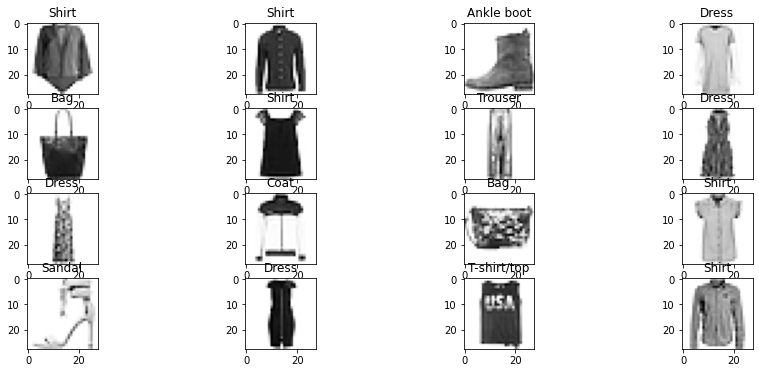



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.9710 - accuracy: 0.6969 - val_loss: 0.6613 - val_accuracy: 0.7829
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5804 - accuracy: 0.8096 - val_loss: 0.5588 - val_accuracy: 0.8122
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.5091 - accu

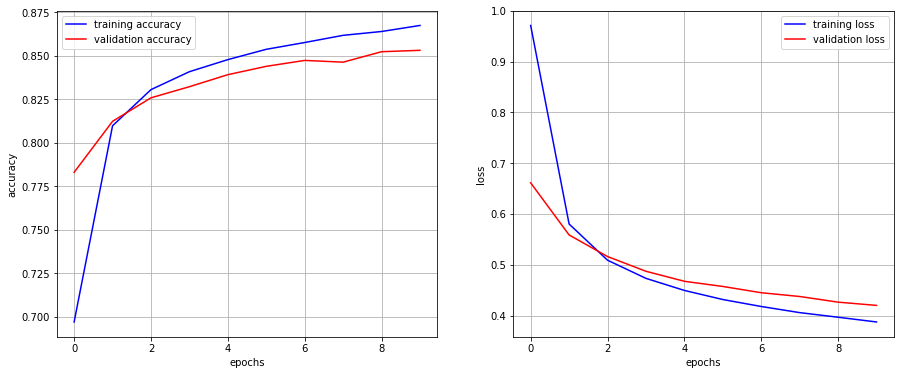



313/313 [==============================] - 1s 2ms/step - loss: 0.4202 - accuracy: 0.8530
Test accuracy: 85.30%


[ 372 6066 7336 2789 3876 6408 6122 4051 4331 3597]
[2.14864244e-07 8.39355430e-09 1.19705152e-08 1.20580514e-08
 2.03933155e-08 4.58642766e-02 2.31673397e-07 2.54006358e-03
 5.40669644e-05 9.51541066e-01]
9
Ankle boot




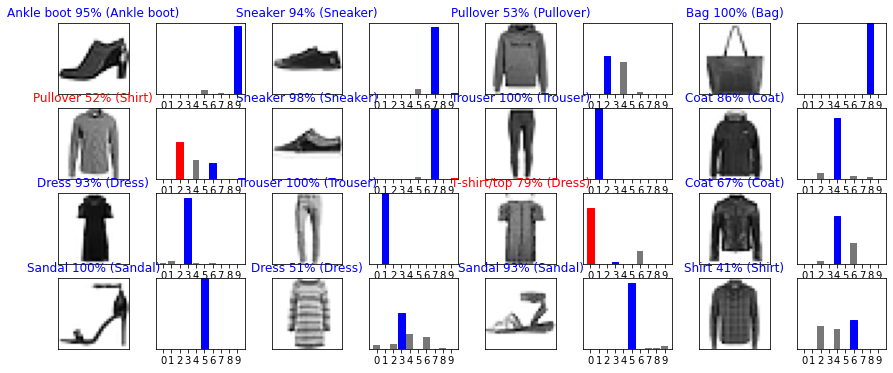



(28, 28)
(1, 28, 28)

-> probabilities on selected image: 
[[2.14863618e-07 8.39353831e-09 1.19705152e-08 1.20580514e-08
  2.03933155e-08 4.58642505e-02 2.31672729e-07 2.54005962e-03
  5.40669098e-05 9.51541066e-01]]
-> most likely label: 9
-> predicted label: Ankle boot


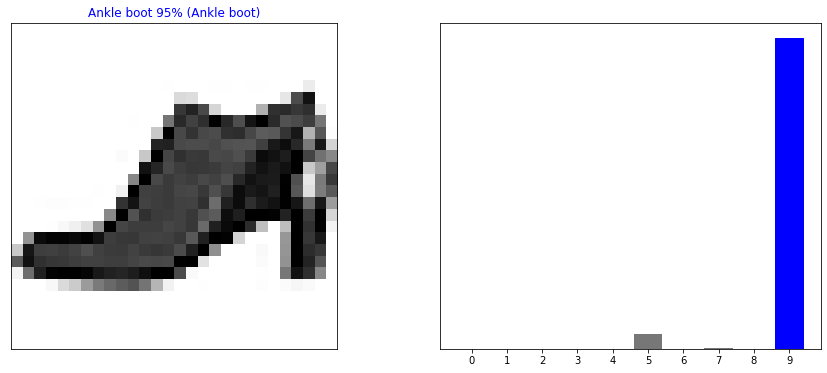


-> Elapsed execution time: 15.9145 seconds.



In [0]:
# TensorFlow Tutorials
# ML basics with Keras 
# Basic image classificaiton
# https://www.tensorflow.org/tutorials/keras/classification



import tensorflow as tf
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from datetime import *

# !pip install -q tensorflow-Hub
# !pip install -q tfds-nightly

# import tensorflow_hub as hub
# import tensorflow_datasets as tfds

# print("TF Version: ", tf.__version__)
# print("Eager mode: ", tf.executing_eagerly())
# print("Hub version: ", hub.__version__)
# print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")


starttime = datetime.now()



# Import the Fashion MNIST dataset:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

print('\n')
# Plotting random examples
img = np.random.permutation(range(train_images.shape[0]))
print(img[:10])


plt.figure(figsize=(15,6))

nb_imgs = 4**2  # a number power 2
for i in range(nb_imgs):
  plt.subplot(np.sqrt(nb_imgs),np.sqrt(nb_imgs),i+1)
  plt.imshow(train_images[img[i],:,:], cmap='Greys')
  plt.title(class_names[train_labels[img[i]]])

plt.show()

print('\n')
# Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:
train_images = train_images/255.0
test_images = test_images/255.0


# Build the model:
# The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.
# After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

# we use 'sparse_categorical_crossentropy' because the labels are in 0:10 integers rather than having been converted to one-hot vectors using to_categorical!!!!
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        target=0.98
        if logs['accuracy']>target :
            print('Reached %0.2f%% training accuracy. Training converged!' %(target*100))
            self.model.stop_training = True
            
callback = myCallback()

history = model.fit(
    train_images,
    train_labels,
    batch_size=128,
    epochs=10,
    validation_data=(test_images, test_labels),
    callbacks=[callback],
    verbose=1
    )


# Plot the training curves:
loss = history.history['loss']
accu = history.history['accuracy']
val_loss = history.history['val_loss']
val_accu = history.history['val_accuracy']

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(accu, 'b', label='training accuracy')
plt.plot(val_accu, 'r', label='validation accuracy')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(loss, 'b', label='training loss')
plt.plot(val_loss, 'r', label='validation loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)

plt.show()

print('\n')


# Evaluate accuracy: compare how the model performs on the validation dataset:
test_loss, test_accu = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy: %0.2f%%' %(test_accu*100))

print('\n')


# Make predictions:
# predicting the labels for the test set:
predictions = model.predict(test_images)

img = np.random.permutation(range(test_images.shape[0]))
print(img[:10])

# prediction on a random example:
print(predictions[img[0]])
# we pick up as predicted label the index with higher probability:
print(np.argmax(predictions[img[0]]))
print(class_names[np.argmax(predictions[img[0]])])


print('\n')


# Plotting some predictions:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap='Greys') # cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  # plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)
  plt.title("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)
  

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


nb_imgs = 4**2  # a number power 2
plt.figure(figsize=(15,6))
for i in range(nb_imgs):
  plt.subplot(np.sqrt(nb_imgs),np.sqrt(nb_imgs)*2,2*i+1)
  plot_image(img[i], predictions[img[i]], test_labels, test_images)
  plt.subplot(np.sqrt(nb_imgs),np.sqrt(nb_imgs)*2,2*i+2)
  plot_value_array(img[i], predictions[img[i]], test_labels)

plt.show()


print('\n')


# Use the model to make a prediciton on a single image
# picking up one random image:
img_sample = test_images[img[0]]
print(img_sample.shape)
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:
# Add the image to a batch where it's the only member.
img_sample = np.expand_dims(img_sample,0)
print(img_sample.shape)

prediction = model.predict(img_sample)
print('\n-> probabilities on selected image: ')
print(prediction)
print('-> most likely label: %d' %(np.argmax(prediction)))
print('-> predicted label: %s' %(class_names[np.argmax(prediction)]))


plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plot_image(img[0], prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(img[0], prediction.reshape(prediction.shape[1]), test_labels)

plt.show()


et1 = datetime.now() - starttime

print( '\n-> Elapsed execution time: %0.4f seconds.\n' %(et1.total_seconds()) )